In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 10)
data = pd.read_csv('fin_int.csv')
data

,Year,District,Latitude,Longitude,Precipitation(mm),...,Crop_Millet,Crop_Paddy,Crop_Wheat,Yield(kg/ha),Production(mt)
0,1982,Achham,29.11,81.3,665.15,...,0,0,0,800.0,400.0
1,1982,Achham,29.11,81.3,665.15,...,0,0,0,1200.0,3420.0
2,1982,Achham,29.11,81.3,665.15,...,1,0,0,1106.0,940.0
3,1982,Achham,29.11,81.3,665.15,...,0,1,0,1399.0,2700.0
4,1982,Achham,29.11,81.3,665.15,...,0,0,1,1050.0,3360.0
...,...,...,...,...,...,...,...,...,...,...,...
11620,2013,Udayapur,26.90,86.5,1091.43,...,0,0,0,1000.0,35.0
11621,2013,Udayapur,26.90,86.5,1091.43,...,0,0,0,2474.0,23500.0
11622,2013,Udayapur,26.90,86.5,1091.43,...,1,0,0,1938.0,5000.0
11623,2013,Udayapur,26.90,86.5,1091.43,...,0,1,0,3466.0,52850.0


In [3]:
data = data[data['Area(ha)'] != 0]
data = data[data['Yield(kg/ha)'] != 0]
data

,Year,District,Latitude,Longitude,Precipitation(mm),...,Crop_Millet,Crop_Paddy,Crop_Wheat,Yield(kg/ha),Production(mt)
0,1982,Achham,29.11,81.3,665.15,...,0,0,0,800.0,400.0
1,1982,Achham,29.11,81.3,665.15,...,0,0,0,1200.0,3420.0
2,1982,Achham,29.11,81.3,665.15,...,1,0,0,1106.0,940.0
3,1982,Achham,29.11,81.3,665.15,...,0,1,0,1399.0,2700.0
4,1982,Achham,29.11,81.3,665.15,...,0,0,1,1050.0,3360.0
...,...,...,...,...,...,...,...,...,...,...,...
11620,2013,Udayapur,26.90,86.5,1091.43,...,0,0,0,1000.0,35.0
11621,2013,Udayapur,26.90,86.5,1091.43,...,0,0,0,2474.0,23500.0
11622,2013,Udayapur,26.90,86.5,1091.43,...,1,0,0,1938.0,5000.0
11623,2013,Udayapur,26.90,86.5,1091.43,...,0,1,0,3466.0,52850.0


In [4]:
data = data.drop('District', axis=1)
data = data.drop('Yield(kg/ha)', axis=1)
# data = data.drop('Area(ha)', axis=1)
data

,Year,Latitude,Longitude,Precipitation(mm),Surface_Pressure(kPa),...,Crop_Maize,Crop_Millet,Crop_Paddy,Crop_Wheat,Production(mt)
0,1982,29.11,81.3,665.15,87.577863,...,0,0,0,0,400.0
1,1982,29.11,81.3,665.15,87.577863,...,1,0,0,0,3420.0
2,1982,29.11,81.3,665.15,87.577863,...,0,1,0,0,940.0
3,1982,29.11,81.3,665.15,87.577863,...,0,0,1,0,2700.0
4,1982,29.11,81.3,665.15,87.577863,...,0,0,0,1,3360.0
...,...,...,...,...,...,...,...,...,...,...,...
11620,2013,26.90,86.5,1091.43,94.958986,...,0,0,0,0,35.0
11621,2013,26.90,86.5,1091.43,94.958986,...,1,0,0,0,23500.0
11622,2013,26.90,86.5,1091.43,94.958986,...,0,1,0,0,5000.0
11623,2013,26.90,86.5,1091.43,94.958986,...,0,0,1,0,52850.0


In [5]:
selected_features = ['Year', 'Latitude', 'Longitude', 'Area(ha)', 'Precipitation(mm)', 'Temp_Range(C)',
#                      'Wet_Bulb_Temp(C)',
                     'Relative_Humidity(%)', 'Surface_Pressure(kPa)', 'Specific_Humidity(g/kg)', 'Crop_Barley', 'Crop_Maize', 'Crop_Millet', 'Crop_Paddy', 'Crop_Wheat', 'Production(mt)']
data_selected = data[selected_features].copy()
data_selected

,Year,Latitude,Longitude,Area(ha),Precipitation(mm),...,Crop_Maize,Crop_Millet,Crop_Paddy,Crop_Wheat,Production(mt)
0,1982,29.11,81.3,500.0,665.15,...,0,0,0,0,400.0
1,1982,29.11,81.3,2850.0,665.15,...,1,0,0,0,3420.0
2,1982,29.11,81.3,850.0,665.15,...,0,1,0,0,940.0
3,1982,29.11,81.3,1930.0,665.15,...,0,0,1,0,2700.0
4,1982,29.11,81.3,3200.0,665.15,...,0,0,0,1,3360.0
...,...,...,...,...,...,...,...,...,...,...,...
11620,2013,26.90,86.5,35.0,1091.43,...,0,0,0,0,35.0
11621,2013,26.90,86.5,9500.0,1091.43,...,1,0,0,0,23500.0
11622,2013,26.90,86.5,2580.0,1091.43,...,0,1,0,0,5000.0
11623,2013,26.90,86.5,15250.0,1091.43,...,0,0,1,0,52850.0


In [7]:
max(data['Temp_Range(C)'])

13.870792349726775

In [6]:
# Define the index for splitting the data
split_index = int(len(data_selected) * 0.8)  # 80% of the data for training

# Split the data into training and testing sets
train_data = data_selected[:split_index]
test_data = data_selected[split_index:]

# Verify the shape of the datasets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (9113, 15)
Test data shape: (2279, 15)


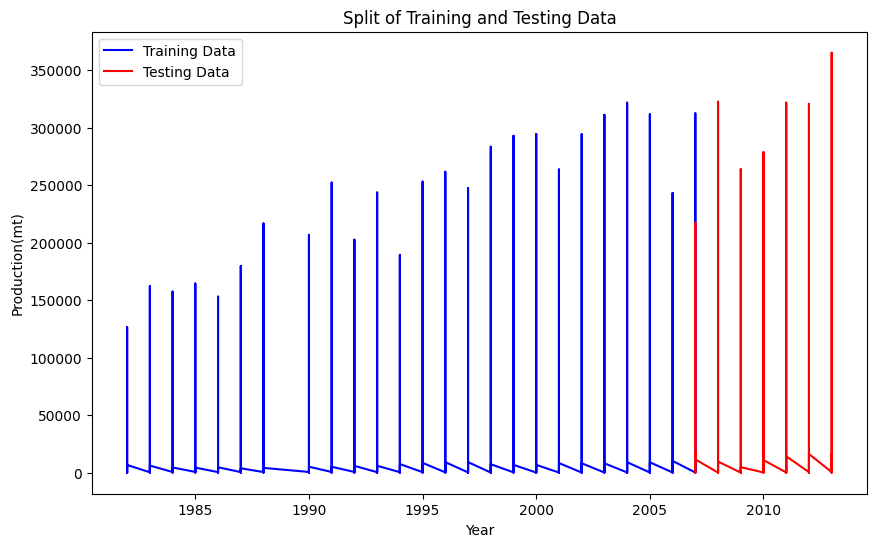

In [7]:
import matplotlib.pyplot as plt

# Extract the 'Year' and 'Production(mt)' columns for plotting
train_years = train_data['Year']
train_production = train_data['Production(mt)']

test_years = test_data['Year']
test_production = test_data['Production(mt)']

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(train_years, train_production, color='blue', label='Training Data')
plt.plot(test_years, test_production, color='red', label='Testing Data')

# Customize the plot
plt.title('Split of Training and Testing Data')
plt.xlabel('Year')
plt.ylabel('Production(mt)')
plt.legend()

# Show the plot
plt.show()

In [8]:
X_train = train_data.drop('Production(mt)', axis=1)
y_train = train_data['Production(mt)']
X_test = test_data.drop('Production(mt)', axis=1)
y_test = test_data['Production(mt)']

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

linear_regression = LinearRegression()
xgboost = XGBRegressor()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
svr = SVR()
ridge = Ridge()
lasso = Lasso()

models = [linear_regression, xgboost, random_forest, gradient_boosting, svr, ridge, lasso]
model_names = ['Linear Regression', 'XGBoost', 'Random Forest', 'Gradient Boosting', 'SVR', 'Ridge', 'Lasso']

for model, name in zip(models, model_names):
    # Step 3: Train the model
    model.fit(X_train, y_train)
    
    # Step 4: Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Step 5: Evaluate the performance of each model
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    mape = (abs((y_test - y_pred) / y_test)).mean() * 100
    
    # Print the evaluation metrics
    print(f"\nModel: {name}")
    print("-------------------------------")
    print("R2 Score:", r2)
    print("Adjusted R2 Score:", adjusted_r2)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("Explained Variance Score (EVS):", evs)
    print("Mean Absolute Percentage Error (MAPE):", mape)


Model: Linear Regression
-------------------------------
R2 Score: 0.8463377012026237
Adjusted R2 Score: 0.8453874926411559
Root Mean Squared Error (RMSE): 16527.442437912112
Mean Absolute Error (MAE): 7489.836528920085
Explained Variance Score (EVS): 0.8464439921044795
Mean Absolute Percentage Error (MAPE): 2403.2023897639415

Model: XGBoost
-------------------------------
R2 Score: 0.8891385662108195
Adjusted R2 Score: 0.8884530273092963
Root Mean Squared Error (RMSE): 14038.226194970031
Mean Absolute Error (MAE): 4856.294669251393
Explained Variance Score (EVS): 0.8896084397063966
Mean Absolute Percentage Error (MAPE): 152.4695159311371

Model: Random Forest
-------------------------------
R2 Score: 0.8880140853855678
Adjusted R2 Score: 0.8873215929807082
Root Mean Squared Error (RMSE): 14109.242274536084
Mean Absolute Error (MAE): 4806.8331000570415
Explained Variance Score (EVS): 0.8884423742049907
Mean Absolute Percentage Error (MAPE): 40.868976375606856

Model: Gradient Boostin

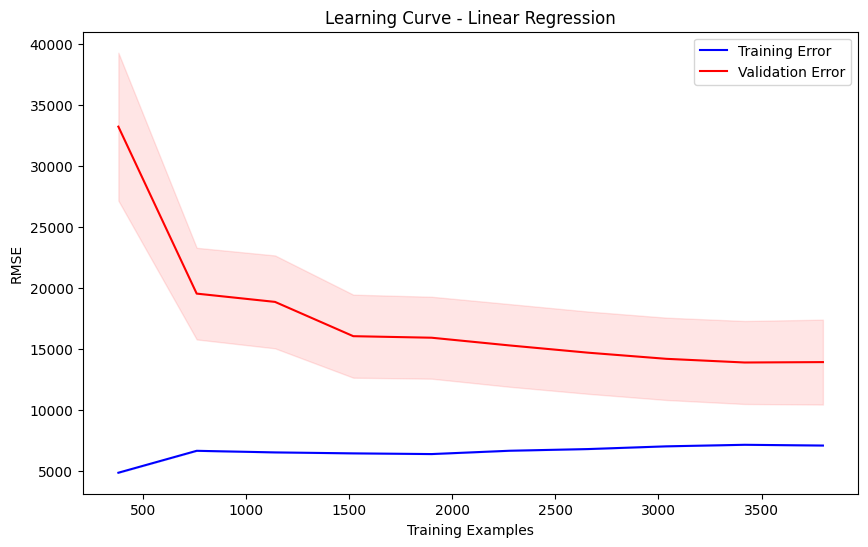

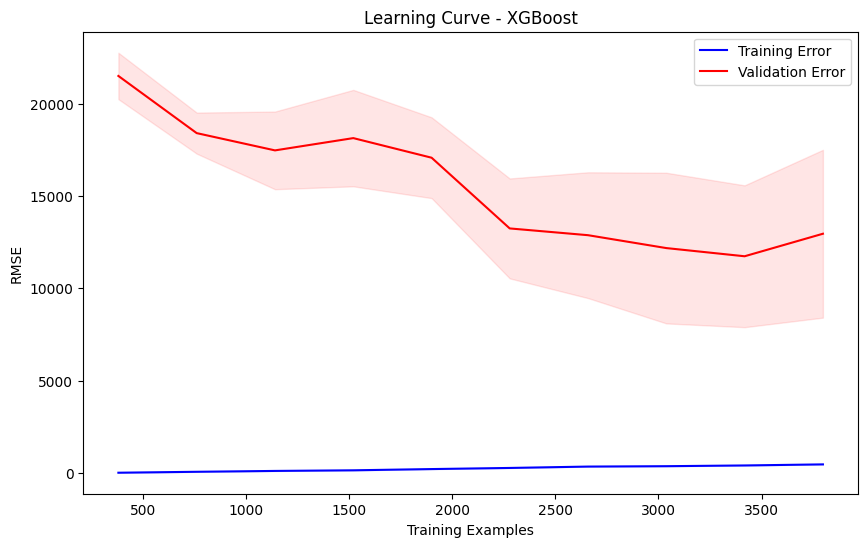

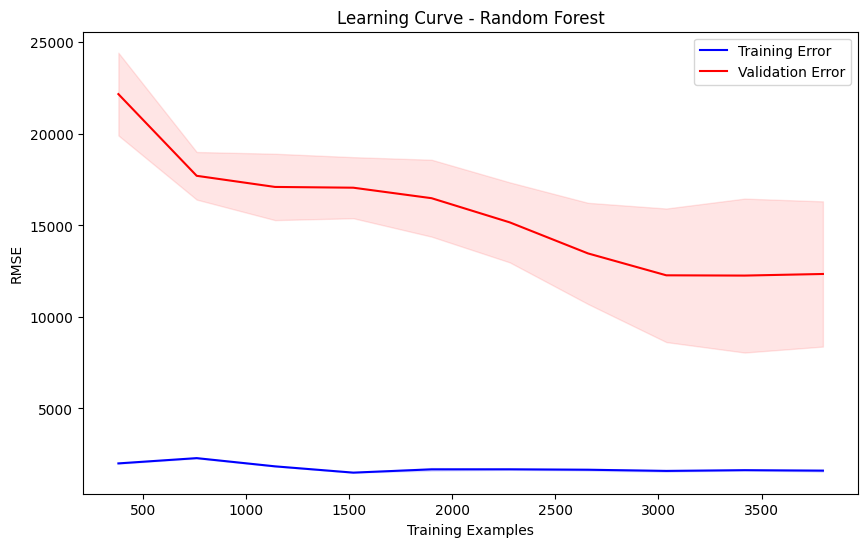

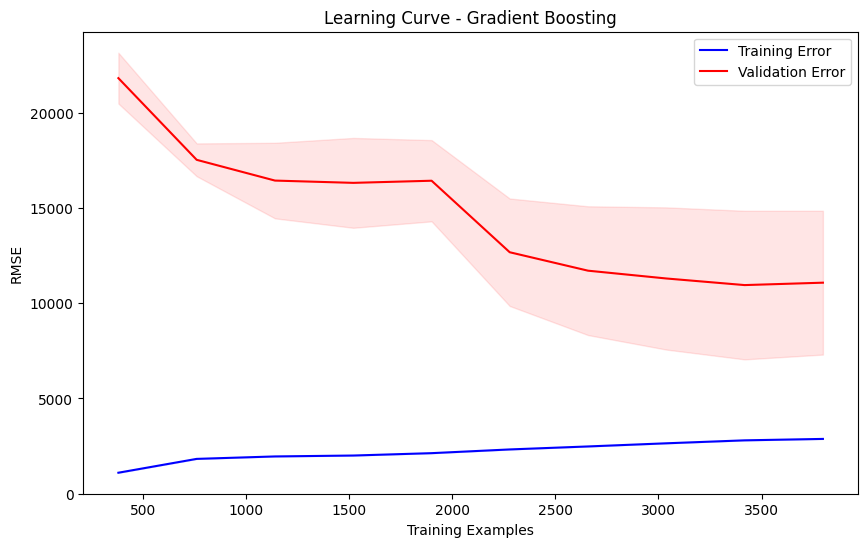

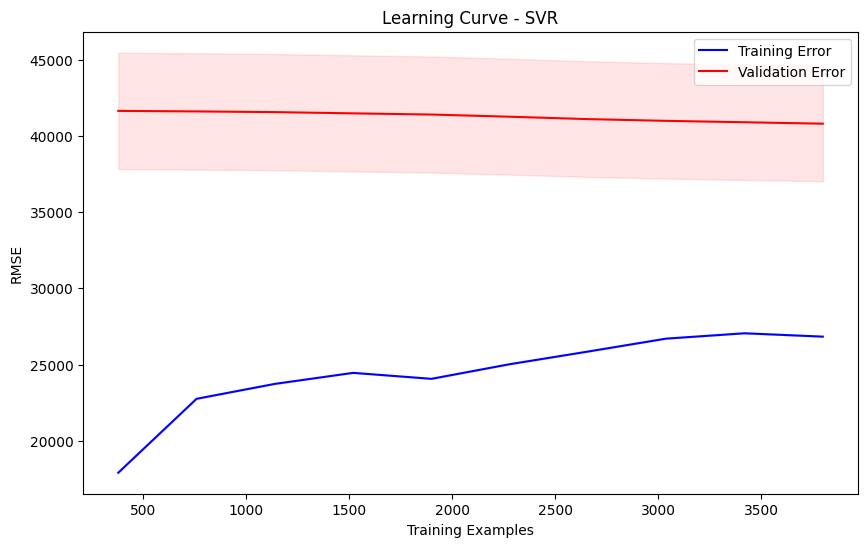

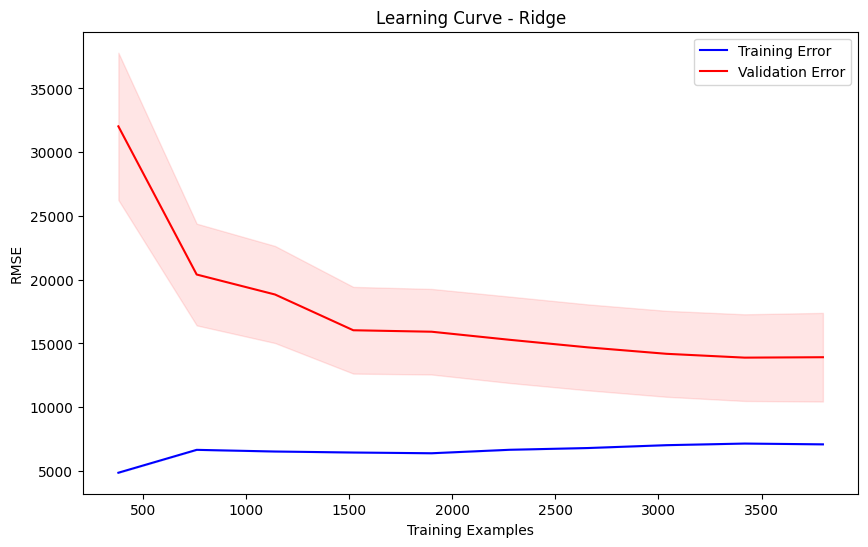

/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.948e+09, tolerance: 1.063e+07
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e+10, tolerance: 3.500e+07
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

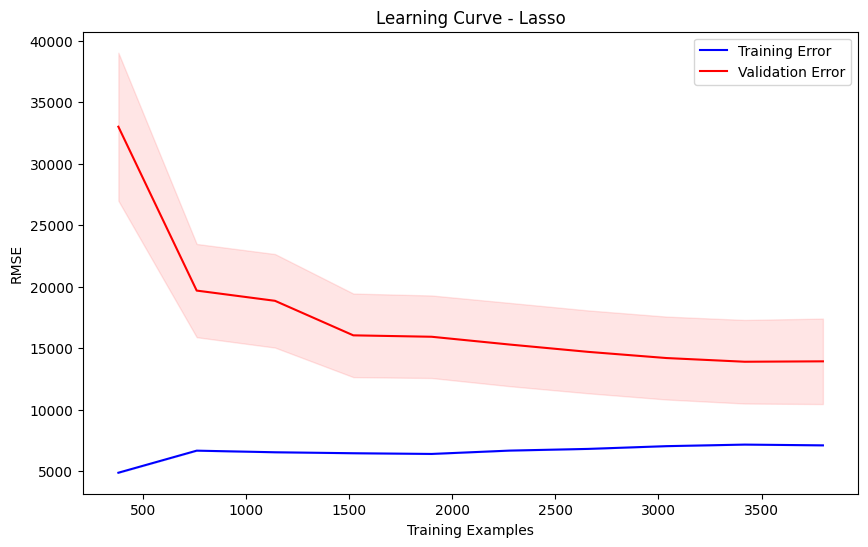

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, learning_curve
from sklearn.metrics import make_scorer, mean_squared_error

# Create a custom RMSE scorer
scorer = make_scorer(mean_squared_error, squared=False)
# tscv = TimeSeriesSplit(n_splits=5)

# models = [lr_best_model, rf_best_model, xgb_best_model, gb_best_model,
#         ridge_best_model, lasso_best_model
# #           ,svr_best_model
#          ]
# model_names = ['Linear Regression', 'Random Forest', 'XGBoost', 'Gradient Boosting', 'Ridge', 'Lasso'
# #                , 'SVR'
#               ]

X = data_selected.drop('Production(mt)', axis=1)
y = data_selected['Production(mt)']

tscv = TimeSeriesSplit(n_splits=2)

for model, name in zip(models, model_names):
    # Generate the learning curve using the time series cross-validator
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=tscv, scoring=scorer,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=False
    )

    # Calculate mean and standard deviation of training and testing scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Error', color='red')

    # Fill the area between the training and validation curves
    plt.fill_between(
        train_sizes, train_mean - train_std, train_mean + train_std,
        alpha=0.1, color='blue'
    )
    plt.fill_between(
        train_sizes, test_mean - test_std, test_mean + test_std,
        alpha=0.1, color='red'
    )

    # Customize the plot
    plt.title(f'Learning Curve - {name}')
    plt.xlabel('Training Examples')
    plt.ylabel('RMSE')
    plt.legend()

    # Show the plot
    plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from hyperopt import fmin, tpe, hp, Trials

# Split the dataset into features (X) and the target variable (y)
# X = data_selected.drop("Production(mt)", axis=1)
# y = data_selected["Production(mt)"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for hyperopt
def objective(params):
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Define the search space for hyperopt
space = {
    "n_estimators": hp.choice("n_estimators", range(10, 201)),
    "max_depth": hp.choice("max_depth", [None, 5, 10, 15]),
    "min_samples_split": hp.choice("min_samples_split", [2, 5, 10]),
    "min_samples_leaf": hp.choice("min_samples_leaf", [1, 2, 4]),
}

# Perform Bayesian optimization with hyperopt
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Print the best hyperparameters
print("Best Hyperparameters:", best)

100%|██████████| 50/50 [03:01<00:00,  3.62s/trial, best loss: 196506849.0886078] 
Best Hyperparameters: {'max_depth': 0, 'min_samples_leaf': 1, 'min_samples_split': 0, 'n_estimators': 24}


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score

rf_best_model = RandomForestRegressor(
    n_estimators=24,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

rf_best_model.fit(X_train, y_train)

y_pred = rf_best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("Random Forest Tuned")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2 Score):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", evs)

Random Forest Tuned
Mean Squared Error: 200888667.73295215
Root Mean Squared Error (RMSE): 14173.519948585537
Mean Absolute Error (MAE): 4867.691496690801
R-squared Score (R2 Score): 0.8869914095487547
Mean Absolute Percentage Error (MAPE): 0.40365739266414374
Explained Variance Score: 0.8875392927079049


# Random Forest Tuning

In [11]:
rf_param_grid = {
    'n_estimators': [150, 200, 300],  # Number of trees in the forest
    'max_depth': [7, 10, 12],          # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 3, 5],   # Minimum number of samples required to be at a leaf node
}

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

X = data_selected.drop('Production(mt)', axis=1)
y = data_selected['Production(mt)']

tscv = TimeSeriesSplit(n_splits=5)

opt_model = GridSearchCV(
    RandomForestRegressor(),
    rf_param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',  # Negative mean squared error for scoring
    verbose=2
)
opt_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.0s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.6s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   2.1s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   2.6s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=7, min_samples_leaf

[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.8s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   3.6s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   2.2s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   3.1s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.3s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   5.2s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   7.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; 

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   3.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   5.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total tim

[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   2.9s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   4.5s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   6.1s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   7.8s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   0.8s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   1.5s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   2.3s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   3.0s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   3.9s
[CV] END max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total tim

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [7, 10, 12],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [150, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [13]:
rf_best_params = opt_model.best_params_
rf_best_model = opt_model.best_estimator_
display(rf_best_params)
display(rf_best_model)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score

y_pred = rf_best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("Random Forest Tuned")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2 Score):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", evs)

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

RandomForestRegressor(max_depth=10, n_estimators=200)

Random Forest Tuned
Mean Squared Error: 198156810.89463848
Root Mean Squared Error (RMSE): 14076.818209191964
Mean Absolute Error (MAE): 4875.912090201298
R-squared Score (R2 Score): 0.8885281975323498
Mean Absolute Percentage Error (MAPE): 0.44653918859872227
Explained Variance Score: 0.889128727972853


In [14]:
# import joblib

# # Save the trained model using joblib
# filename = 'tuned_rf_model.pkl'
# joblib.dump(rf_best_model, filename)

['tuned_rf_model.pkl']

# Linear Regression Tuning

In [14]:
lr_param_grid = {
    'fit_intercept': [True, False]
}

opt_model = GridSearchCV(
    LinearRegression(),
    lr_param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',  # Negative mean squared error for scoring
    verbose=2
)
opt_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=2)

In [15]:
lr_best_params = opt_model.best_params_
lr_best_model = opt_model.best_estimator_
display(lr_best_params)
display(lr_best_model)

y_pred = lr_best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("Linear Regression Tuned")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2 Score):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", evs)

{'fit_intercept': True}

LinearRegression()

Linear Regression Tuned
Mean Squared Error: 273156353.5385006
Root Mean Squared Error (RMSE): 16527.442437912185
Mean Absolute Error (MAE): 7489.836528920147
R-squared Score (R2 Score): 0.8463377012026224
Mean Absolute Percentage Error (MAPE): 24.03202389764036
Explained Variance Score: 0.8464439921044782


# XGBoost Tuning

In [16]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}
opt_model = GridSearchCV(
    XGBRegressor(),
    xgb_param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',  # Negative mean squared error for scoring
    verbose=2
)
opt_model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_e

[CV] END .learning_rate=0.001, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END .learning_rate=0.00

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, imp...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [17]:
xgb_best_params = opt_model.best_params_
xgb_best_model = opt_model.best_estimator_
display(xgb_best_params)
display(xgb_best_model)

y_pred = xgb_best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("Linear Regression Tuned")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2 Score):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", evs)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Linear Regression Tuned
Mean Squared Error: 184635930.55972078
Root Mean Squared Error (RMSE): 13588.080458980245
Mean Absolute Error (MAE): 4730.903630585686
R-squared Score (R2 Score): 0.8961342792767923
Mean Absolute Percentage Error (MAPE): 1.7439470496144416
Explained Variance Score: 0.8965012486474799


# Gradient Boost Tuning

In [21]:
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}
opt_model = GridSearchCV(
    GradientBoostingRegressor(),
    gb_param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',  # Negative mean squared error for scoring
    verbose=2
)
opt_model.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   2.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   2.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=3, n_e

[CV] END .learning_rate=0.001, max_depth=3, n_estimators=300; total time=   1.5s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=300; total time=   2.3s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=300; total time=   3.1s
[CV] END .learning_rate=0.001, max_depth=3, n_estimators=300; total time=   3.9s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.4s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.8s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   1.3s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   1.8s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=100; total time=   2.3s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=200; total time=   0.8s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=200; total time=   1.7s
[CV] END .learning_rate=0.001, max_depth=5, n_estimators=200; total time=   2.6s
[CV] END .learning_rate=0.00

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [22]:
gb_best_params = opt_model.best_params_
gb_best_model = opt_model.best_estimator_
display(gb_best_params)
display(gb_best_model)

y_pred = gb_best_model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
evs = explained_variance_score(y, y_pred)

print("Linear Regression Tuned")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2 Score):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", evs)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

GradientBoostingRegressor(max_depth=7)

Linear Regression Tuned
Mean Squared Error: 2994490.0602571215
Root Mean Squared Error (RMSE): 1730.4594939660165
Mean Absolute Error (MAE): 954.3322488893422
R-squared Score (R2 Score): 0.9974750432934735
Mean Absolute Percentage Error (MAPE): 0.6142812111199843
Explained Variance Score: 0.9974750432934735


# Ridge Regression Tuning

In [23]:
ridge_param_grid = {
    'alpha': [0.1, 1, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}
opt_model = GridSearchCV(
    Ridge(),
    ridge_param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',  # Negative mean squared error for scoring
    verbose=2
)
opt_model.fit(X, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END .........................alpha=0.1, solver=cholesky; total time=   0.0s
[CV] END .........................alpha=0.1, sol

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg']},
             scoring='neg_mean_squared_error', verbose=2)

In [24]:
ridge_best_params = opt_model.best_params_
ridge_best_model = opt_model.best_estimator_
display(ridge_best_params)
display(ridge_best_model)

y_pred = ridge_best_model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
evs = explained_variance_score(y, y_pred)

print("Linear Regression Tuned")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2 Score):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", evs)

{'alpha': 0.1, 'solver': 'auto'}

Ridge(alpha=0.1)

Linear Regression Tuned
Mean Squared Error: 110498796.19988182
Root Mean Squared Error (RMSE): 10511.840761725884
Mean Absolute Error (MAE): 5380.170290753695
R-squared Score (R2 Score): 0.906827315865578
Mean Absolute Percentage Error (MAPE): 11.868965470536178
Explained Variance Score: 0.906827315865578


# Lasso Regression Tuning

In [25]:
lasso_param_grid = {
    'alpha': [0.1, 1, 10],
    'selection': ['cyclic', 'random']
}
opt_model = GridSearchCV(
    Lasso(),
    lasso_param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',  # Negative mean squared error for scoring
    verbose=2
)
opt_model.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ........................alpha=0.1, selection=cyclic; total time=   0.1s
[CV] END ........................alpha=0.1, selection=cyclic; total time=   0.1s
[CV] END ........................alpha=0.1, selection=cyclic; total time=   0.1s


/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.579e+10, tolerance: 9.863e+07
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.374e+10, tolerance: 2.493e+08
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

[CV] END ........................alpha=0.1, selection=cyclic; total time=   0.1s
[CV] END ........................alpha=0.1, selection=cyclic; total time=   0.1s
[CV] END ........................alpha=0.1, selection=random; total time=   0.0s
[CV] END ........................alpha=0.1, selection=random; total time=   0.0s


/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.473e+11, tolerance: 4.338e+08
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.478e+11, tolerance: 7.065e+08
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

[CV] END ........................alpha=0.1, selection=random; total time=   0.1s
[CV] END ........................alpha=0.1, selection=random; total time=   0.1s
[CV] END ........................alpha=0.1, selection=random; total time=   0.1s
[CV] END ..........................alpha=1, selection=cyclic; total time=   0.0s


/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.999e+09, tolerance: 2.493e+08
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.170e+09, tolerance: 4.338e+08
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

[CV] END ..........................alpha=1, selection=cyclic; total time=   0.0s
[CV] END ..........................alpha=1, selection=cyclic; total time=   0.1s
[CV] END ..........................alpha=1, selection=cyclic; total time=   0.1s
[CV] END ..........................alpha=1, selection=cyclic; total time=   0.1s
[CV] END ..........................alpha=1, selection=random; total time=   0.0s
[CV] END ..........................alpha=1, selection=random; total time=   0.0s
[CV] END ..........................alpha=1, selection=random; total time=   0.1s
[CV] END ..........................alpha=1, selection=random; total time=   0.1s


/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.863e+10, tolerance: 9.863e+07
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.024e+10, tolerance: 2.493e+08
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

[CV] END ..........................alpha=1, selection=random; total time=   0.1s
[CV] END .........................alpha=10, selection=cyclic; total time=   0.0s
[CV] END .........................alpha=10, selection=cyclic; total time=   0.0s
[CV] END .........................alpha=10, selection=cyclic; total time=   0.1s
[CV] END .........................alpha=10, selection=cyclic; total time=   0.0s
[CV] END .........................alpha=10, selection=cyclic; total time=   0.0s
[CV] END .........................alpha=10, selection=random; total time=   0.0s
[CV] END .........................alpha=10, selection=random; total time=   0.0s
[CV] END .........................alpha=10, selection=random; total time=   0.1s
[CV] END .........................alpha=10, selection=random; total time=   0.1s
[CV] END .........................alpha=10, selection=random; total time=   0.0s


/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.065e+10, tolerance: 1.351e+09
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 10],
                         'selection': ['cyclic', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [26]:
lasso_best_params = opt_model.best_params_
lasso_best_model = opt_model.best_estimator_
display(lasso_best_params)
display(lasso_best_model)

y_pred = lasso_best_model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
evs = explained_variance_score(y, y_pred)

print("Lasso Regression Tuned")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2 Score):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", evs)

{'alpha': 0.1, 'selection': 'cyclic'}

Lasso(alpha=0.1)

Lasso Regression Tuned
Mean Squared Error: 110498797.31712924
Root Mean Squared Error (RMSE): 10511.840814868214
Mean Absolute Error (MAE): 5380.071342941025
R-squared Score (R2 Score): 0.906827314923514
Mean Absolute Percentage Error (MAPE): 11.8672610318387
Explained Variance Score: 0.906827314923514


# SVR Tuning

In [28]:
svr_param_grid = {
    'C': [0.001, 0.1, 1],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}
opt_model = GridSearchCV(
    SVR(),
    svr_param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',  # Negative mean squared error for scoring
    verbose=2
)
opt_model.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   0.4s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   1.0s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   2.3s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   4.1s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   6.9s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   0.3s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   1.0s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   1.9s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   3.2s
[CV] END ..................C=0.001, epsilon=0.01, kernel=rbf; total time=   4.9s
[CV] END ................C=0.001, epsilon=0.1, kernel=linear; total time=   0.4s
[CV] END ................C=0.001, epsilon=0.1, k

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SVR(),
             param_grid={'C': [0.001, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [29]:
svr_best_params = opt_model.best_params_
svr_best_model = opt_model.best_estimator_
display(svr_best_params)
display(svr_best_model)

y_pred = svr_best_model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
evs = explained_variance_score(y, y_pred)

print("Lasso Regression Tuned")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2 Score):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", evs)

{'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}

SVR(C=1, epsilon=0.01, kernel='linear')

Lasso Regression Tuned
Mean Squared Error: 142197048.94787735
Root Mean Squared Error (RMSE): 11924.640411680235
Mean Absolute Error (MAE): 4720.613944172181
R-squared Score (R2 Score): 0.8800993206975617
Mean Absolute Percentage Error (MAPE): 2.626440785877136
Explained Variance Score: 0.880463744878412


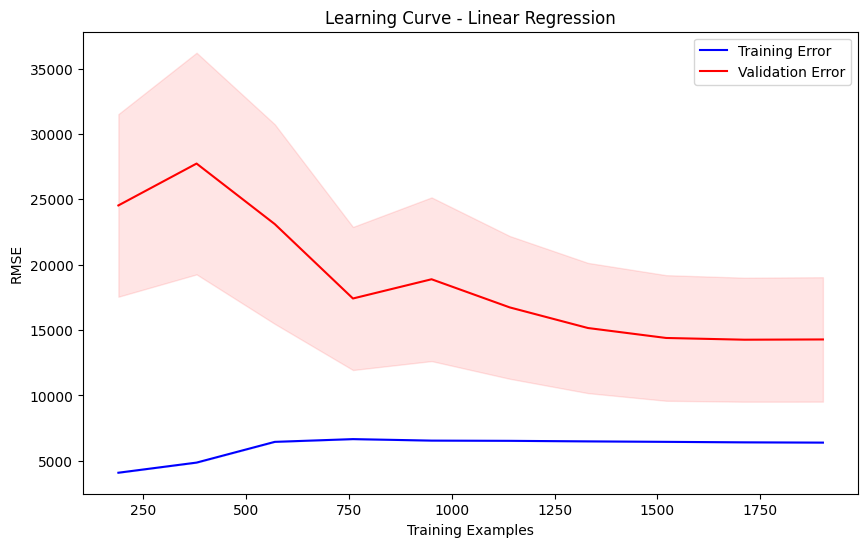

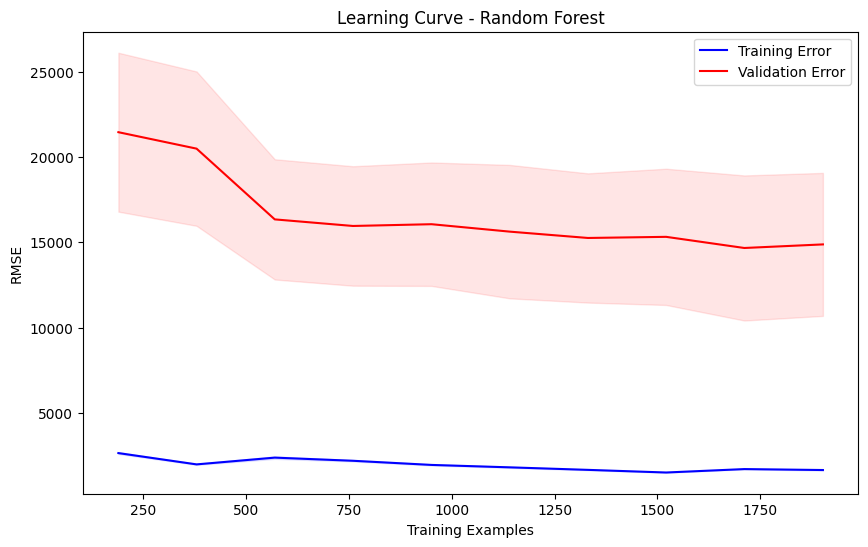

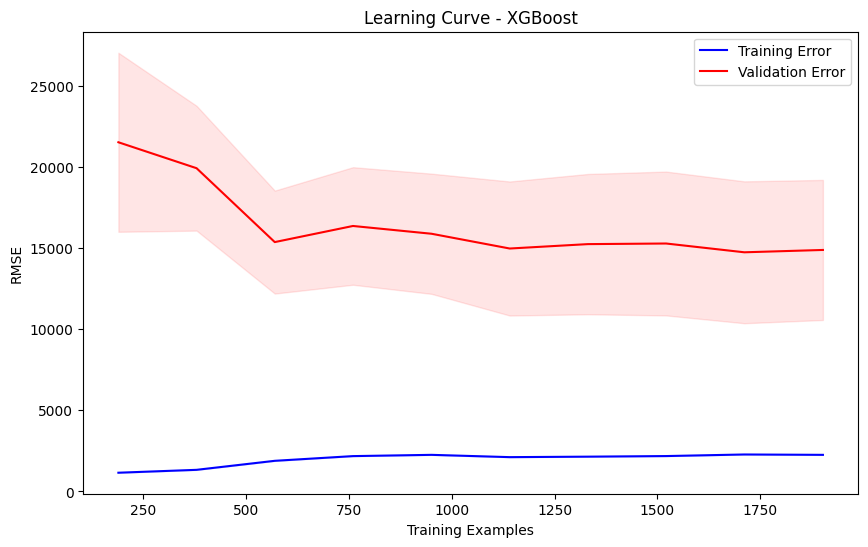

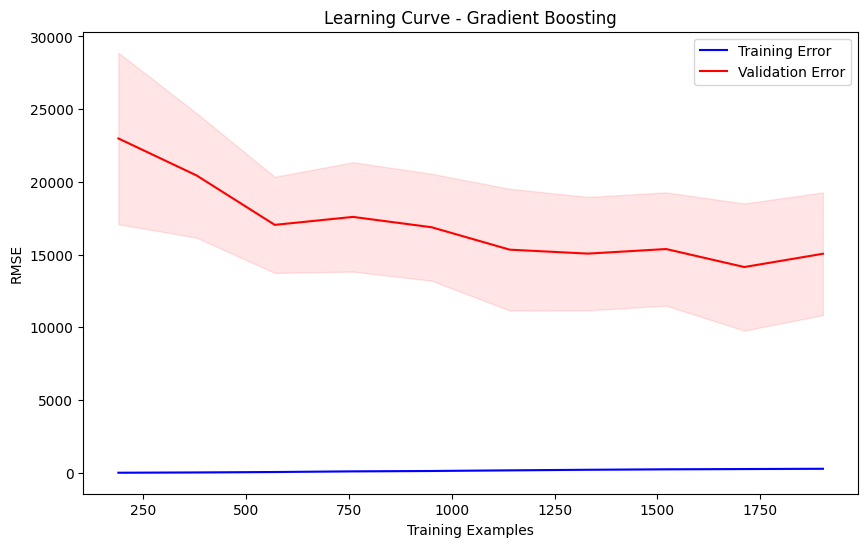

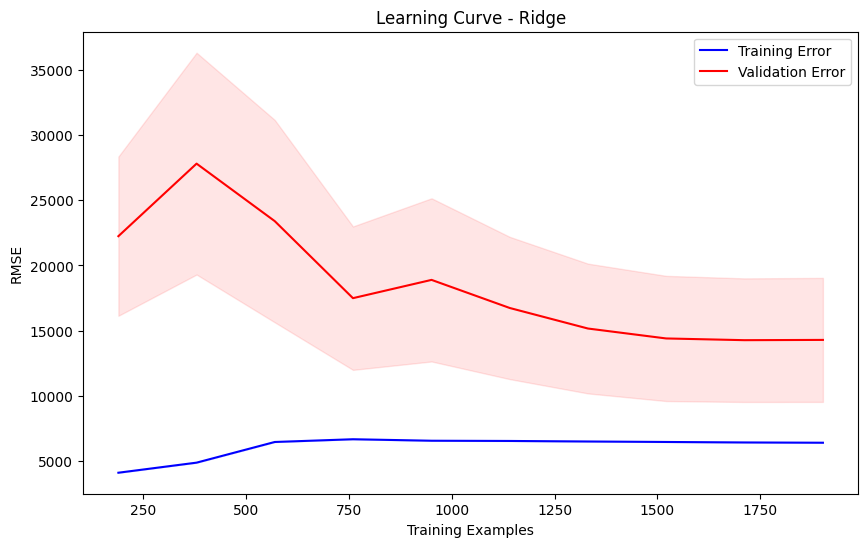

/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.588e+09, tolerance: 5.109e+06
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.437e+09, tolerance: 1.063e+07
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.669e+09, tolerance: 4.539e+07
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.999e+09, tolerance: 5.730e+07
  model = cd_fast.enet_coordinate_descent(
/home/asu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

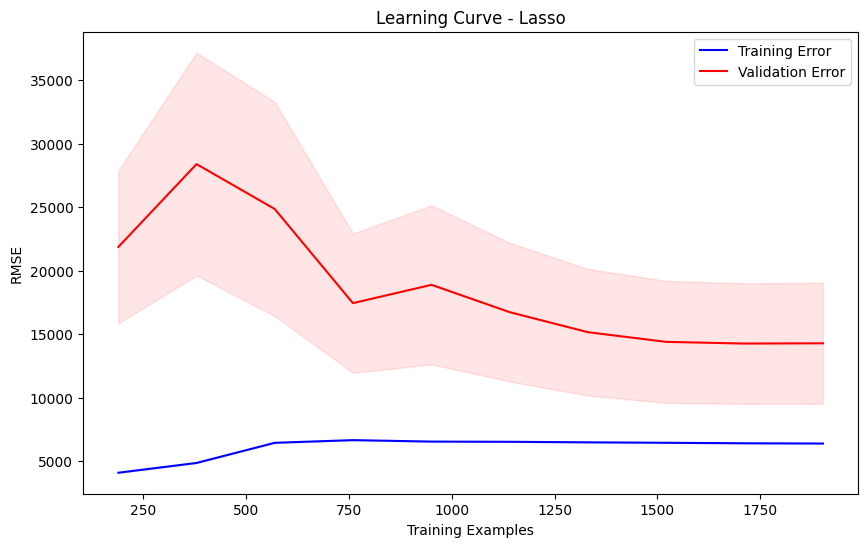

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, learning_curve
from sklearn.metrics import make_scorer, mean_squared_error

# Create a custom RMSE scorer
scorer = make_scorer(mean_squared_error, squared=False)
tscv = TimeSeriesSplit(n_splits=5)

models = [lr_best_model, rf_best_model, xgb_best_model, gb_best_model,
        ridge_best_model, lasso_best_model
#           ,svr_best_model
         ]
model_names = ['Linear Regression', 'Random Forest', 'XGBoost', 'Gradient Boosting', 'Ridge', 'Lasso'
#                , 'SVR'
              ]

X = data_selected.drop('Production(mt)', axis=1)
y = data_selected['Production(mt)']

tscv = TimeSeriesSplit(n_splits=5)

for model, name in zip(models, model_names):
    # Generate the learning curve using the time series cross-validator
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=tscv, scoring=scorer,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=False
    )

    # Calculate mean and standard deviation of training and testing scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Error', color='red')

    # Fill the area between the training and validation curves
    plt.fill_between(
        train_sizes, train_mean - train_std, train_mean + train_std,
        alpha=0.1, color='blue'
    )
    plt.fill_between(
        train_sizes, test_mean - test_std, test_mean + test_std,
        alpha=0.1, color='red'
    )

    # Customize the plot
    plt.title(f'Learning Curve - {name}')
    plt.xlabel('Training Examples')
    plt.ylabel('RMSE')
    plt.legend()

    # Show the plot
    plt.show()

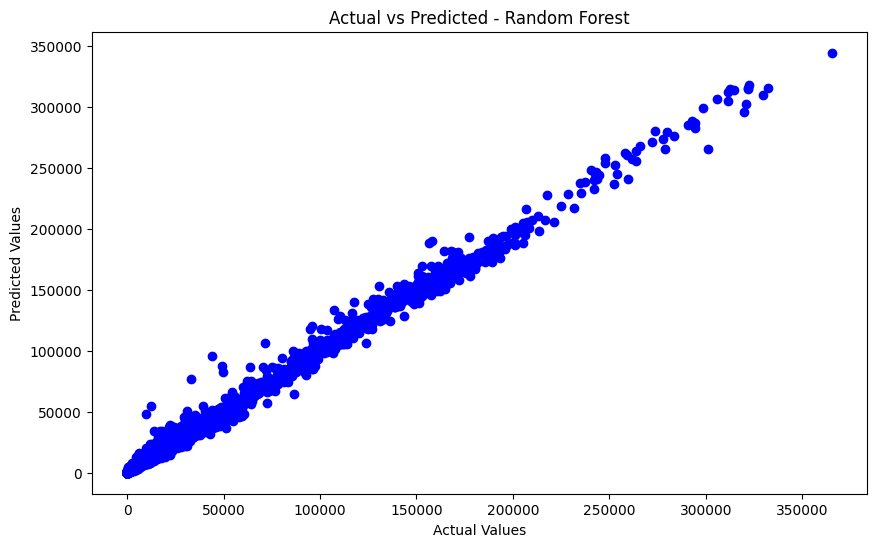

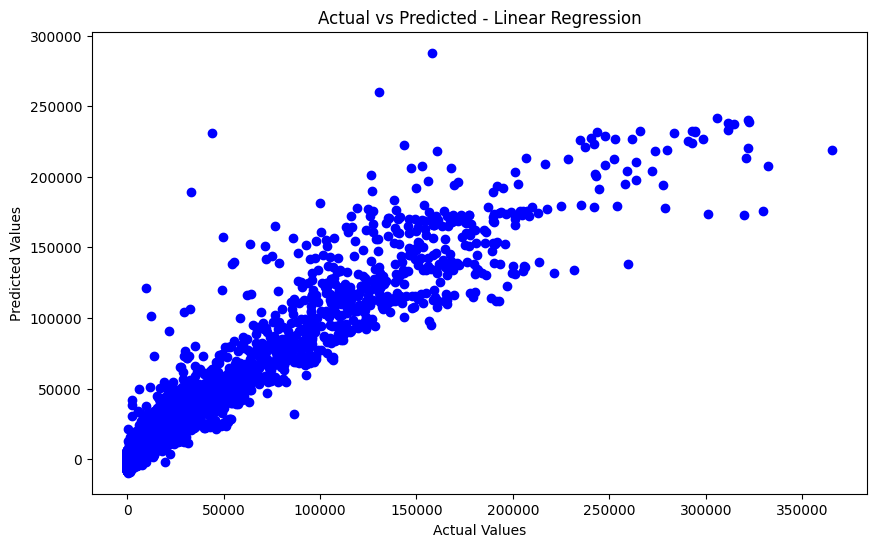

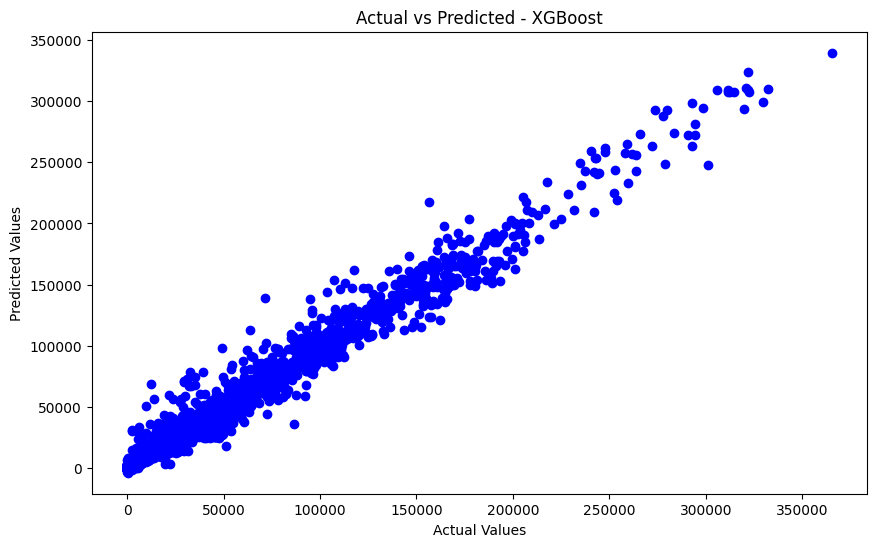

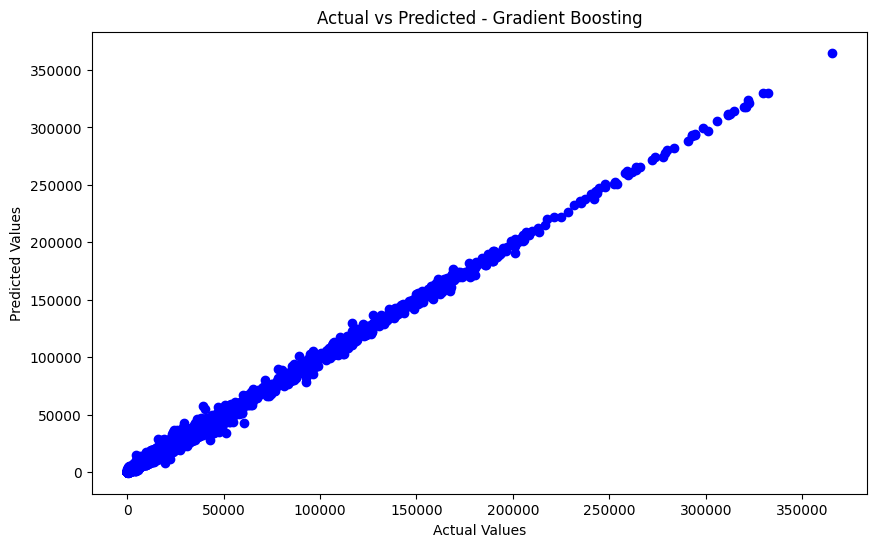

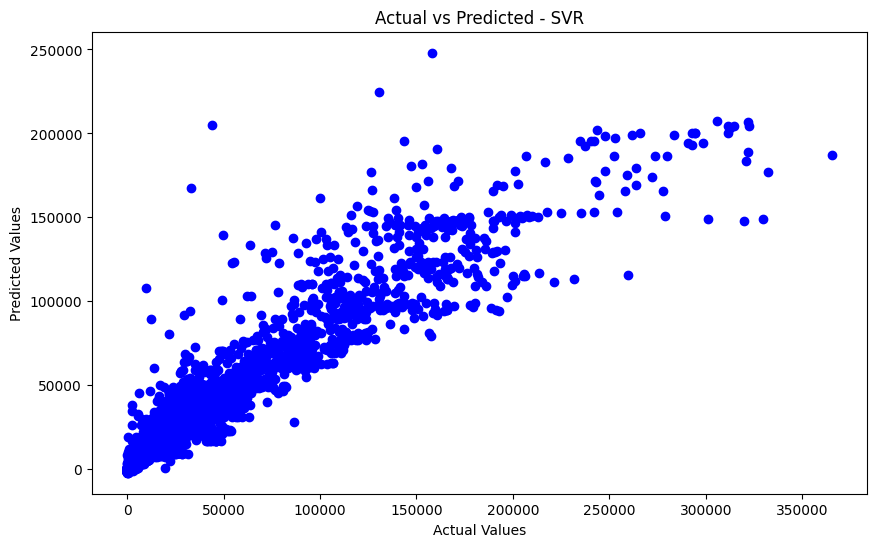

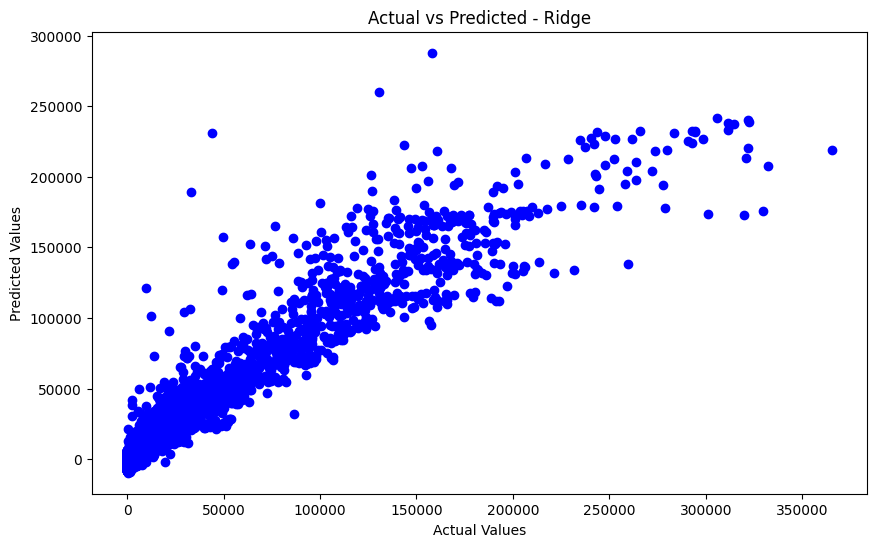

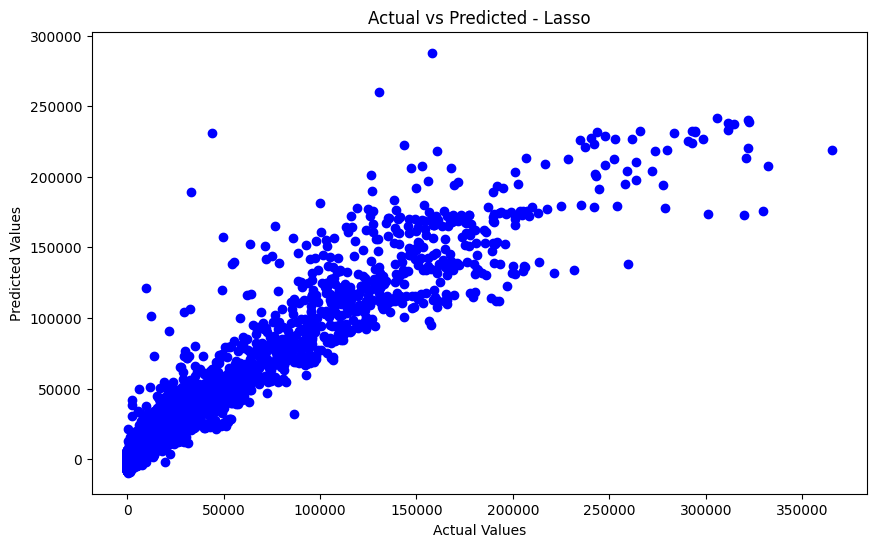

In [48]:
import matplotlib.pyplot as plt

models = [rf_best_model, lr_best_model, xgb_best_model, gb_best_model, svr_best_model, ridge_best_model, lasso_best_model]
model_names = ['Random Forest', 'Linear Regression', 'XGBoost', 'Gradient Boosting', 'SVR', 'Ridge', 'Lasso']

X = data_selected.drop('Production(mt)', axis=1)
y = data_selected['Production(mt)']

for model, name in zip(models, model_names):
    # Make predictions on the entire dataset
    y_pred = model.predict(X)
    
    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, color='blue')
    
    # Customize the plot
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    
    # Show the plot
    plt.show()

In [55]:
max(data['Production(mt)'])

365250.0